# Step 4: Plotting Curves

In [1]:
# Import libraries
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [2]:
# Read CSV
cleaned_speeches = pd.read_csv("part2.csv", index_col = 0)
cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,FleschReadingEase
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649


In [3]:
cleaned_speeches["sentences"] = cleaned_speeches.sentences.apply(lambda x: ast.literal_eval(x))

In [4]:
# Create a DataFrame from Obama's 2010 speech
obama2010 = pd.DataFrame(cleaned_speeches.sentences[0])
obama2010.columns = ["sentences"]

obama2010

,sentences
0,"Madam Speaker, Vice President Biden, members o..."
1,"For 220 years, our leaders have fulfilled thi..."
2,They've done so during periods of prosperity ...
3,And they've done so in the midst of war and d...
4,\n\nIt's tempting to look back on these moment...
...,...
557,)\n\nThank you
558,God bless you
559,And God bless the United States of America
560,(Applause


In [6]:
cleaned_speeches = cleaned_speeches.astype({'year': 'str'})
cleaned_speeches["full_name"] = cleaned_speeches["name"] + " " +  cleaned_speeches["year"]
cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,FleschReadingEase,full_name
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562,77.754448,17.826429,24.720575,obama 2010
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500,82.046000,16.543303,32.322806,obama 2011
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[ Mr, Speaker, Mr, Vice President, members o...",518,81.474903,17.344065,26.228014,obama 2012
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"[Mr, Speaker, Mr, Vice President, members of...",455,90.553846,14.187551,52.062427,obama 2013
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",352,113.661932,19.064501,9.227649,obama 2014


In [7]:
# Get the compound score of each row's sentence

analyzer = SentimentIntensityAnalyzer()
compound_list = []
for sentence in obama2010.sentences:
    vs = analyzer.polarity_scores(sentence)
    compound_list.append(float(vs["compound"]))
obama2010 = obama2010.assign(compound = compound_list)

In [8]:
# Create the index column
indexes = [i for i in range(len(obama2010))]
obama2010["index"] = indexes

### Normalize the values in the index column
Normalization means bringing the set of values to be between 0 and 1. 

We divide all of the values in the column with the largest number, i.e. the last value in the column.

In [9]:
obama2010 = obama2010.assign(index = lambda x: x.index / (len(obama2010)-1))
obama2010

,sentences,compound,index
0,"Madam Speaker, Vice President Biden, members o...",0.0000,0.000000
1,"For 220 years, our leaders have fulfilled thi...",0.4215,0.001783
2,They've done so during periods of prosperity ...,0.4215,0.003565
3,And they've done so in the midst of war and d...,-0.1779,0.005348
4,\n\nIt's tempting to look back on these moment...,0.7184,0.007130
...,...,...,...
557,)\n\nThank you,0.3612,0.992870
558,God bless you,0.5994,0.994652
559,And God bless the United States of America,0.7717,0.996435
560,(Applause,0.4215,0.998217


<AxesSubplot:xlabel='index', ylabel='compound'>

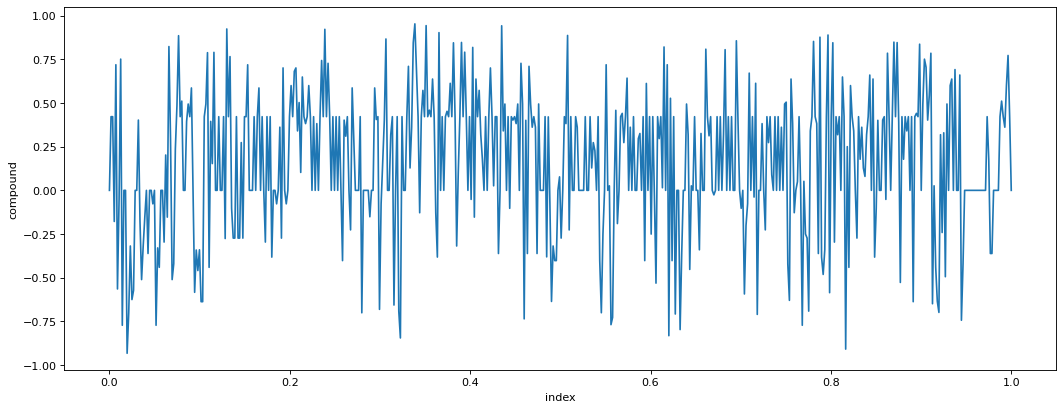

In [10]:
# Plot index vs compound

plt.figure(figsize=(16, 6), dpi=80)
sns.lineplot(data = obama2010, x = "index", y = "compound") 

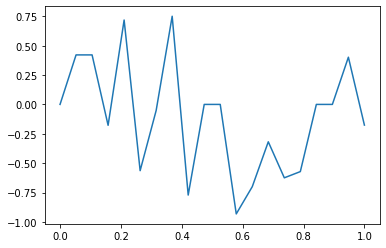

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

# Plot an interpolated smooth curve for Obama's 2010 speech
numbers = np.linspace(0.0,1.0,20)

T = numbers
power = obama2010.compound.to_numpy()[0:20]

plt.plot(T,power)
plt.show()

Now that we have done the analysis for Obama's 2010 speech, we proceed with the rest of the speeches.

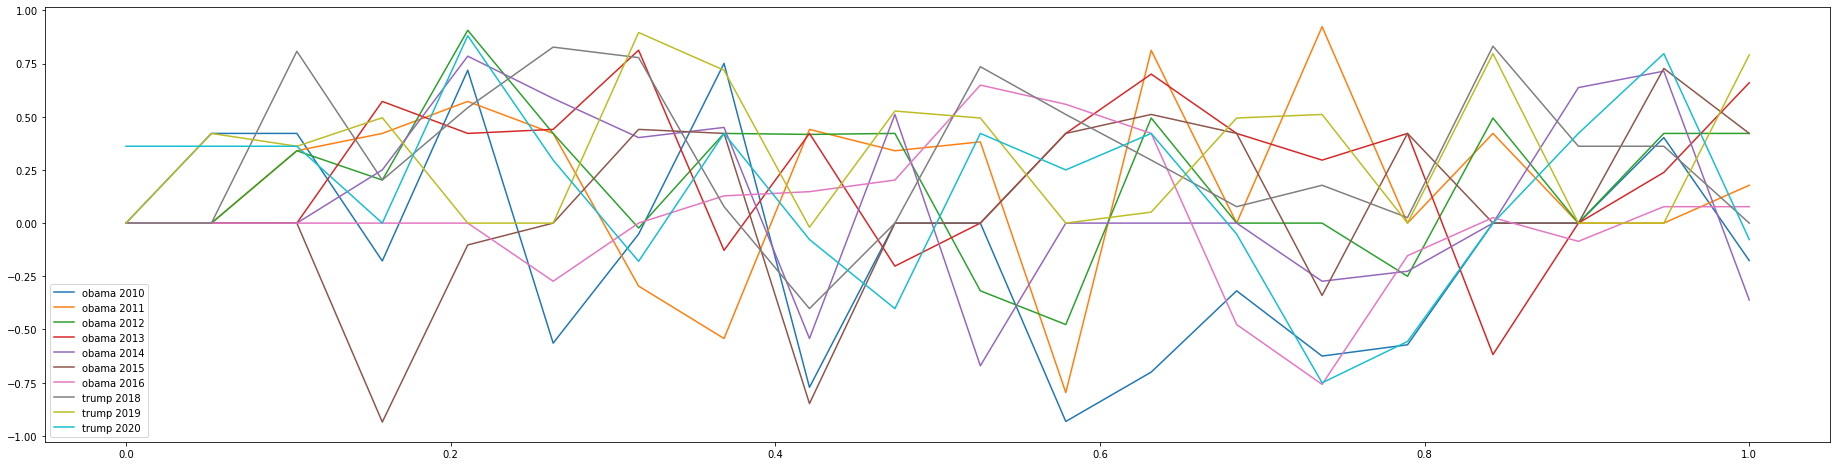

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

obama2010 = pd.DataFrame(cleaned_speeches.sentences[0])
obama2011 = pd.DataFrame(cleaned_speeches.sentences[1])
obama2012 = pd.DataFrame(cleaned_speeches.sentences[2])
obama2013 = pd.DataFrame(cleaned_speeches.sentences[3])
obama2014 = pd.DataFrame(cleaned_speeches.sentences[4])
obama2015 = pd.DataFrame(cleaned_speeches.sentences[5])
obama2016 = pd.DataFrame(cleaned_speeches.sentences[6])
trump2018 = pd.DataFrame(cleaned_speeches.sentences[7])
trump2019 = pd.DataFrame(cleaned_speeches.sentences[8])
trump2020 = pd.DataFrame(cleaned_speeches.sentences[9])
speeches = [obama2010, obama2011, obama2012, obama2013, obama2014, obama2015, obama2016, trump2018, trump2019, trump2020]

plt.figure(figsize=(32, 8))

for speech in speeches:
    speech.columns = ["sentences"]
    
    analyzer = SentimentIntensityAnalyzer()
    compound_list = []
    for sentence in speech.sentences:
        vs = analyzer.polarity_scores(sentence)
        compound_list.append(float(vs["compound"]))
    speech = speech.assign(compound = compound_list)
    
    indexes = [i for i in range(len(speech))]
    speech["index"] = indexes
    
    speech = speech.assign(index = lambda x: x.index / (len(speech)-1))
    
    # plt.figure(figsize=(16, 6), dpi=80)
    # sns.lineplot(data = speech, x = "index", y = "compound") 

    # Plot 20 points
    numbers = np.linspace(0.0,1.0,20)
    T = numbers
    power = speech.compound.to_numpy()[0:20]
    plt.plot(T,power)
    plt.legend(cleaned_speeches.full_name)

plt.show()


# The End

In this project, we explored the SOTU speeches of Obama and Trump, gaining valuable insights in the way they structure their speech. We see a difference in their readability scores, the sentence lengths and more. We may expand the scope of this project by analysing different speeches (for instance, campaign/rally speeches) or using different readability measures.